In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

#Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import normalize,scale

In [2]:
def regression_(x,y):
    
    lr=LinearRegression()
    r=Ridge()
    l=Lasso()
    e=ElasticNet()
    kn=KNeighborsRegressor()
    et=ExtraTreeRegressor()
    gb=GradientBoostingRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
       
    algos=[lr,r,l,e,kn,et,gb,dt,xgb]
    algos_names=['LinearRegressor','Ridge','Lasso','ElasticNet','KNeighbors','ExtraTree','GradientBoosting','DecisionTree','XGB']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)
    
    r_score=[]
    mse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_square','MSE','MAE'],index=algos_names)
    
    for algo in algos:
        pred =algo.fit(x,y).predict(x)
        r_score.append(r2_score(y,pred))
        mse.append(mean_squared_error(y,pred)**.5)
        mae.append(mean_absolute_error(y,pred))
    
    result.R_square=r_score
    result.MSE=mse
    result.MAE=mae
    
    result.plot.line(subplots=True)
    plt.xticks(rotation=60)
    plt.show()
    return result.sort_values('R_square',ascending=False)

In [3]:
df = pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

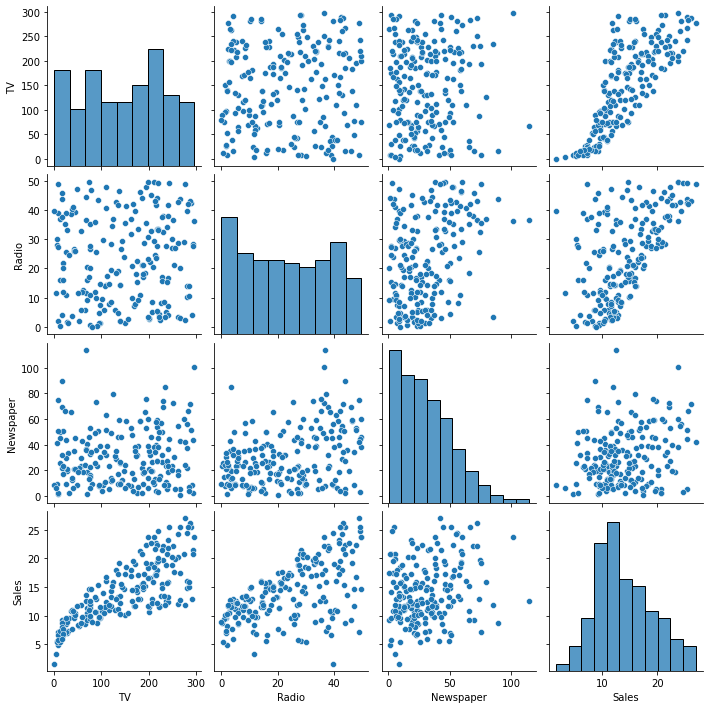

In [5]:
sns.pairplot(df)

In [6]:
abs(df.corr()["Sales"]).sort_values(ascending = False) 

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

In [7]:
y = df["Sales"]

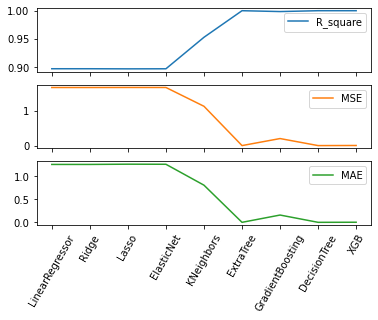

,R_square,MSE,MAE
ExtraTree,1.000000,0.000000,0.000000
DecisionTree,1.000000,0.000000,0.000000
XGB,1.000000,0.003007,0.002150
GradientBoosting,0.998492,0.202094,0.157689
KNeighbors,0.952944,1.128954,0.803300
LinearRegressor,0.897211,1.668570,1.252011
Ridge,0.897211,1.668570,1.252016
ElasticNet,0.897135,1.669187,1.255563
Lasso,0.897024,1.670088,1.257180


In [8]:
x1 = df[["TV","Radio","Newspaper"]]
regression_(x1,y)

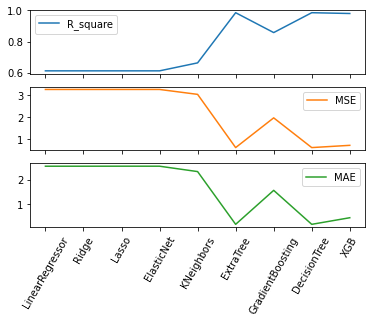

,R_square,MSE,MAE
ExtraTree,0.985760,0.621048,0.173000
DecisionTree,0.985760,0.621048,0.173000
XGB,0.980715,0.722737,0.443123
GradientBoosting,0.857977,1.961325,1.562864
KNeighbors,0.663153,3.020554,2.330400
LinearRegressor,0.611875,3.242322,2.549806
Ridge,0.611875,3.242322,2.549806
ElasticNet,0.611874,3.242328,2.550331
Lasso,0.611870,3.242343,2.550809


In [9]:
x2 = df[["TV"]]
regression_(x2,y)

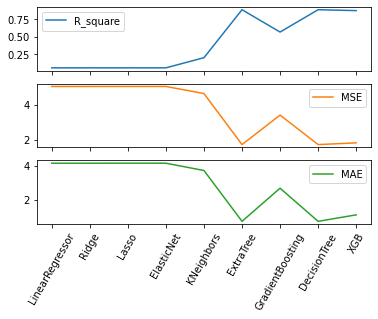

,R_square,MSE,MAE
ExtraTree,0.889574,1.729446,0.731667
DecisionTree,0.889574,1.729446,0.731667
XGB,0.876510,1.828884,1.112530
GradientBoosting,0.567598,3.422270,2.679795
KNeighbors,0.198494,4.659333,3.718400
LinearRegressor,0.052120,5.066954,4.146560
Ridge,0.052120,5.066954,4.146560
ElasticNet,0.052099,5.067012,4.147421
Lasso,0.052042,5.067163,4.148194


In [10]:
x3 = df[["Newspaper"]]
regression_(x3,y)

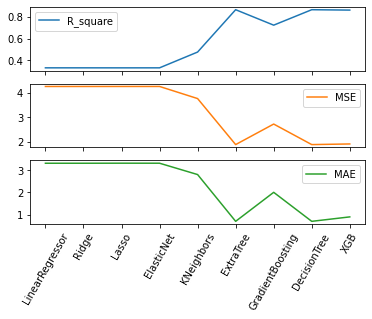

,R_square,MSE,MAE
ExtraTree,0.866908,1.898655,0.695167
DecisionTree,0.866908,1.898655,0.695167
XGB,0.863305,1.924184,0.895828
GradientBoosting,0.724686,2.730764,2.005845
KNeighbors,0.477189,3.763074,2.808800
LinearRegressor,0.332032,4.253516,3.320219
Ridge,0.332032,4.253516,3.320221
ElasticNet,0.331972,4.253709,3.321556
Lasso,0.331864,4.254052,3.322452


In [11]:
x4 = df[["Radio"]]
regression_(x4,y)